<a href="https://colab.research.google.com/github/Askoye/Personal-loan-acceptance-project-for-Thera-Bank/blob/main/Personal_loan_acceptance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Personal loan acceptance project for Thera Bank**

---




---



## 1. Defining the Question
Thera Bank's management wants to explore ways of converting its liability customers to personal loan customers. The data used is based on a marketing campaign that the bank ran last year towards sales of the personal loan. The data scientists at Thera have been tasked to study the factors that will determine whether a customer will accept a personal loan.



---
---

## a) Specifying the Question
* Creating a model that can predict whether an individual will accept a personal loan given various factors.
* Other Questions:
> 1. What level of education should Thera Bank target while marketing personal loans.
> 2. Which other product offered by the bank influences one to take a personal loan
> 3. What family size should be targeted when marketing a personal loan to the customers.
> 4. What is the most important feature to consider while marketing the personal loan.







## b) Defining the Metric for Success
* Best predicting whether or not a customer will take a personal loan.
* Advising the bank on the factors to prioritize in a customer when marketing.


## c) Understanding the context

* **Personal loans** are borrowed money that can be used for large purchases, debt consolidation, emergency expenses and much more and are paid back in monthly installments over the course of typically two to six years. 

* Personal loans are taken for

    * Debt consolidation.
    * Alternative to a payday loan.
    *  Home remodeling.
    *  Moving costs.
    *  Emergency expenses.
    *  Large purchases.

Source: https://www.bankrate.com/loans/personal-loans/top-reasons-to-apply-for-personal-loan/

## d) Recording the Experimental Design

1) Business Understanding: Understanding the business problem.

2) Reading the data to a pandas dataframe: Reading our dataset as well as the definitions dataset.


 3) Checking our data: Reading the head and tail of our dataset.

 4) Data cleaning: Converting column names to lowercase, dropping irrelevant columns, changing errors in entry.


 5) EDA: Visualizing our data using univariate, bivariate and multivariate analysis.

6) Implementing the solution: We will be using Decision trees, SVM, Naive Bayes, KNN , Random Forest and ADABoost models to make predictions.


 7) Conclusion: Giving the best model for our predictions.


 8)Challenging the solution: Using Neural Networks.

## Reading our dataset


In [ ]:
# Importing our libraries
import pandas as pd # To put data in tabular form of rows and columns.
import numpy as np # To perform a number of mathematical operations on arrays
import matplotlib.pyplot as plt # For visualization in Python
import seaborn as sns # For making statistical graphics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading our variable definitions
df_definitions= pd.read_excel("/content/Bank_loan_variable_definitions.xlsx")
df_definitions

Variable                                         Definition
0                  ID                                         Customer ID
1                 Age                   Customer's age in completed years
2           Experience                   years of professional experience
3              Income                Annual income of the customer ($000)
4             ZIP Code                              Home Address ZIP code
5              Family                         Family size of the customer
6                CCAvg     Avg. spending on credit cards per month ($000)
7            Education                        Education level of customer
8             Mortgage             Value of house mortgage if any. ($000)
9        Personal Loan  Did this customer accept the personal loan off...
10  Securities Account  Does the customer have a securities account wi...
11          CD Account  Does the customer have a certificate of deposi...
12              Online  Does the customer use internet banking facilit...
13         Credit card  Does the customer use a credit card issued by ...

In [ ]:
# Reading the top of our dataset
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [ ]:
# Reading the bottom of our dataset
df.tail()

ID  Age  Experience  ...  CD Account  Online  CreditCard
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5 rows x 14 columns]

In [ ]:
# Checking the number of rows and columns
df.shape

(5000, 14)

Our data has 5,000 entries and 14 columns which are shown below.

In [ ]:
# Names of our columns
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Cleaning our dataset


### Tidying our dataset

In [ ]:
# Change column names to lowercase and replace spacing with underscore
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(2)

id  age  experience  ...  cd_account  online  creditcard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0

[2 rows x 14 columns]

Our column names are now tidy.

In [ ]:
# Dropping irrelevant column id
df.drop(['id'], axis = 1, inplace= True) 
# confirming that column has been dropped
df.head()

age  experience  income  ...  cd_account  online  creditcard
0   25           1      49  ...           0       0           0
1   45          19      34  ...           0       0           0
2   39          15      11  ...           0       0           0
3   35           9     100  ...           0       0           0
4   35           8      45  ...           0       0           1

[5 rows x 13 columns]

The column we do not need is dropped

In [ ]:
# Check whether each column has appropriate data types
df.dtypes

age                     int64
experience              int64
income                  int64
zip_code                int64
family                  int64
ccavg                 float64
education               int64
mortgage                int64
personal_loan           int64
securities_account      int64
cd_account              int64
online                  int64
creditcard              int64
dtype: object

Family, education,personal_loan,securities_account,cd_account	online and creditcard should be categorical.

### Dealing with missing data

In [ ]:
# Checking for null values
df.isnull().sum()

age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

We have no missing values in our dataset so we are good to go.

### Checking for consistency and uniformity

In [ ]:
# Checking for unique values for each column
for column in df.columns:
  print('\n')
  print( df[column].nunique())
  print(df[column].unique())



45
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


47
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


162
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]


467
[91107 90089 94720 94112 91330 92121 9

From our dataset, there are negative experiences (-2,-3,-1) which is not realistic to have negative experience. We therefore need to correct that.

In [ ]:
# Our dataset has experience -2,-3,-1 which should be removed
df= df[~((df.experience==-2)|(df.experience==-3)|(df.experience==-1))] 
# Confirming the change
df['experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

We have managed to get rid of the negative experiences.

### Dealing with duplicated data

In [ ]:
# Checking for duplicates
df.duplicated().any()

False

Our data has no duplicates

### Checking for Outliers




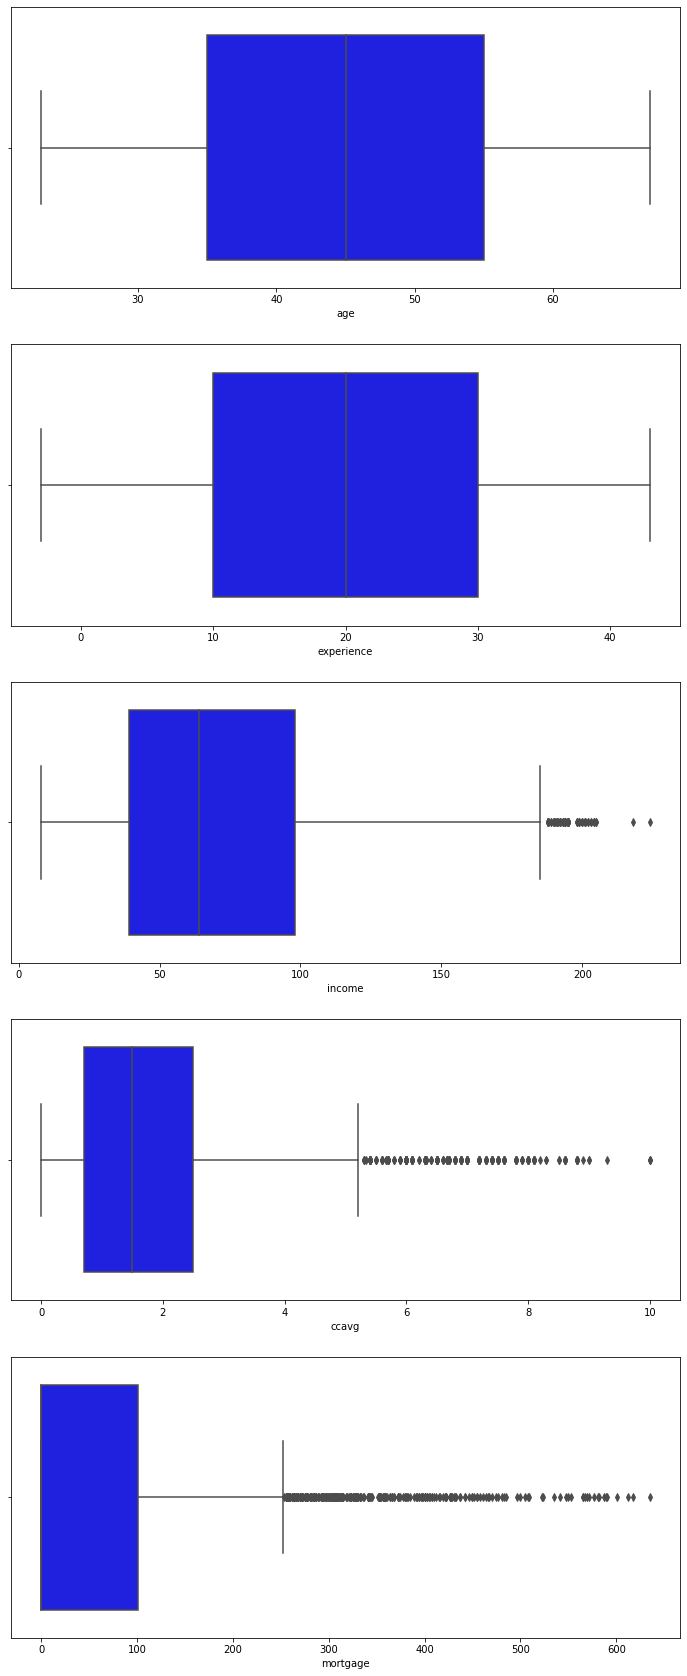

In [ ]:
# Checking for outliers using boxplots for our numeric variables
fig, ((ax1),(ax2), (ax3),(ax4),(ax5)) = plt.subplots(5 ,figsize=(12, 30))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['age'], ax=ax1, color='blue')
sns.boxplot(df['experience'], ax=ax2, color='blue')
sns.boxplot(df['income'], ax=ax3, color='blue')
sns.boxplot(df['ccavg'], ax=ax4, color='blue')
sns.boxplot(df['mortgage'], ax=ax5, color='blue')



plt.show()

There are outliers in mortgage, income and average spending on credit cards per month.  We will not drop our outliers as they will be relevant in making predictions.

## EDA

In [ ]:
# Using pandas profiling for our univariate analysis
import pandas_profiling as pp
pp.ProfileReport(df)

* Experience and Age gives a positive correlation ,as age increases experience also increases.
* We can see the education level that more people are in is the undergraduate level.

* Mortgage gives a positive correlation with income. As income increases, mortgage also increases.

* Some variables showed a big percentage of their data contained Zero values

Income has 3462 zeros which is (69.2%) of its data as well as mortgage with the same result

Mortgage has 3462 zeros (69.2%)




### Histograms, Boxplots and Scatterplots

Histograms

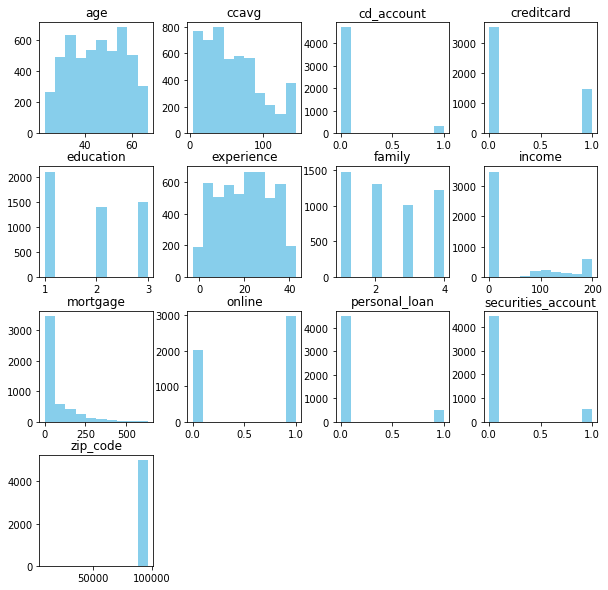

In [ ]:
#Plotting histograms to check that if data columns are normal or almost normal or not
df.hist(figsize=(10,10),color="skyblue",grid=False)
plt.show()

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.
Also we can see median is equal to mean.

2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.

3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.

4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.

5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.

6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.

7.Distribution of "Family" and "Education" are evenly distributed

## Violin Plots

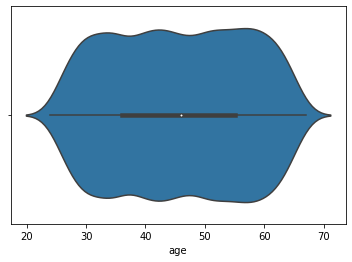

In [ ]:
# Plotting violin distribution for our age variable
sns.violinplot(x=df["age"])

* Our dataset is fairly distributed between the ages 30 and 60.



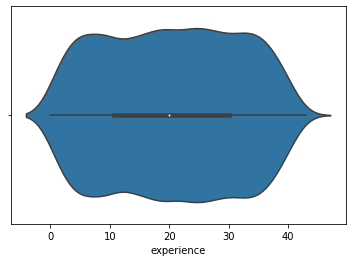

In [ ]:
# Plotting violin distribution of our variable experience
sns.violinplot(x=df["experience"])

* Our dataset is fairly distributed between 5 and 35 years of experience.

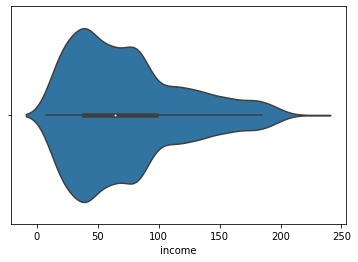

In [ ]:
# Plotting violin distribution of our variable income
sns.violinplot(x=df["income"])

* Our dataset has more records of customers earning less than 100 thousand dollars.

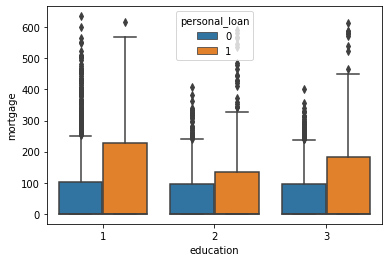

In [ ]:
# Boxplots showing the distribution of whether or not a customer takes the loan with respect to their level of education
sns.boxplot(x="education", y='mortgage', hue="personal_loan", data=df)

* Customers with eduaction 1 (graduates) accepted more personal loans followed by education 3 (professionals). This could be because they are funding their studies.

## Countplots

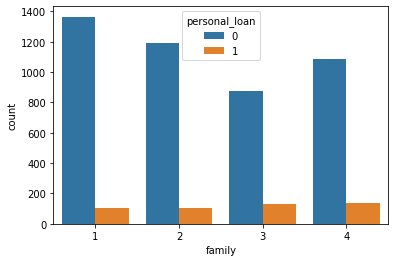

In [ ]:
# A plot showing uptake of the personal loan based on family type
sns.countplot(x='family',data=df,hue='personal_loan')

* There is no that much impact on Personal Loan if we consider Family attribute.
But the Family with size 3 and 4 is taking more Personal loans as compared to other smaller family sizes.

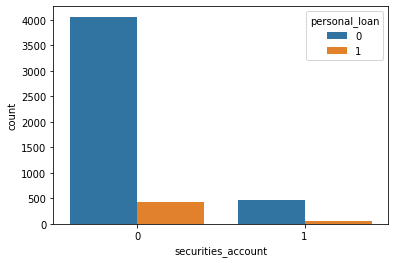

In [ ]:
# A plot showing uptake of the personal loan based on whether a customer has a securities account
sns.countplot(x="securities_account", data=df,hue="personal_loan")

* The Majority are customers who do not have Personal loan , have Securities Account.

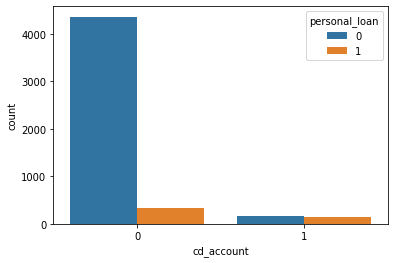

In [ ]:
# A plot showing uptake of the personal loan based on whether or not  an individual has a security account.
sns.countplot(x='cd_account',data=df,hue='personal_loan')

* The customers having a CDAccount did not take Personal loan.
And the customers without CDAccount took a Personal Loan.

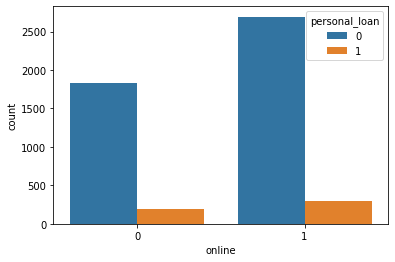

In [ ]:
# A plot showing uptake of the personal loan based on whether or not a customer has an online account
sns.countplot(x='online',data=df,hue='personal_loan')

* More customers with an online account took the personal loan compared to those without an online account.

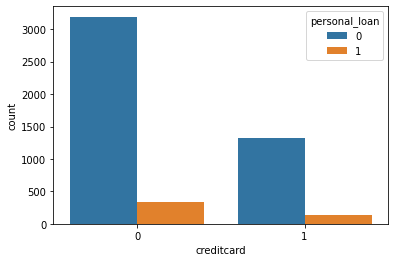

In [ ]:
# A plot showing uptake of the personal loan based on whether or not a customer has a credit card
sns.countplot(x='creditcard',data=df,hue='personal_loan')

* Less customers with credit card took the personal loan compared to those without a credit card.

### Heatmap

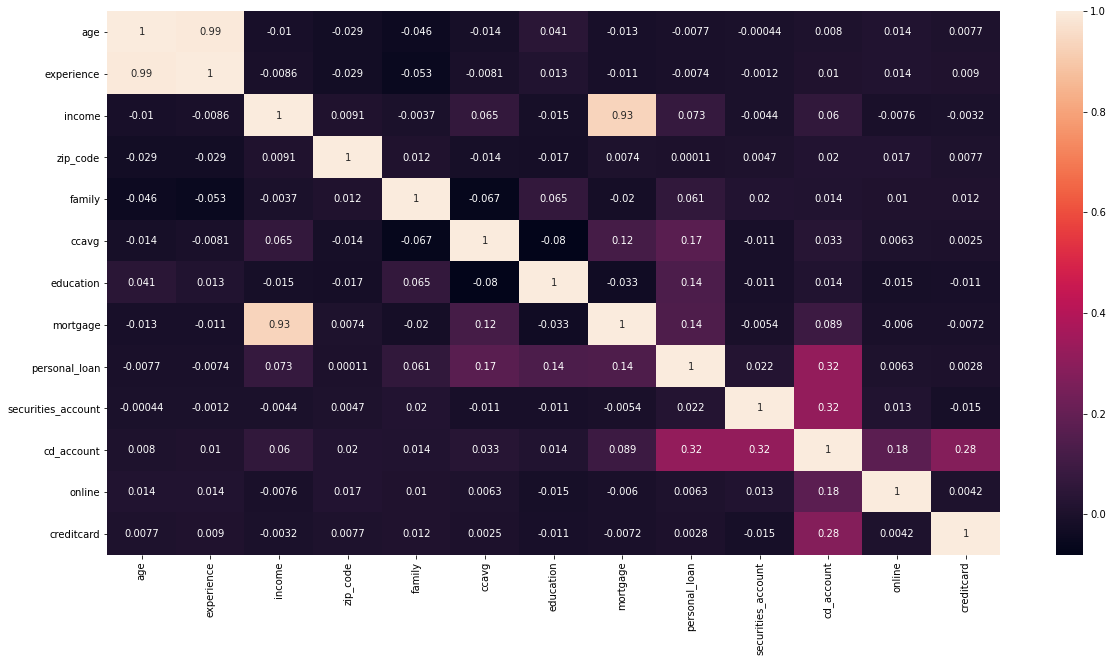

In [ ]:
# Plotting a histogram to show correlation between variables
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

* There is high correlation between age and experience (0.99)
* There is high correlation between mortgage and income (0.93)

### EDA Summary Report

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.

2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.

3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.

4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.

5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.

6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.

7.Distribution of "Family" and "Education" are evenly distributed

8.Income and CCAvg is moderately correlated.

9.Experience and Age gives a positive correlation.

10.Families with income less than 100K are less likely to take loan,than families with high income.

11.The customers whose education level is 1 is having more income than the others.

12.The customers with and without Personal Loan have high Mortage.

13.Families with income less than 100K are less likely to take loan,than families with high income.

14.There is no that much impact on Personal Loan if we consider Family attribute. 
But the Family with size 3 is taking more Personal loan as compare to other family size.

15.The Majority is the customers who do not have Personal loan have Securities Account.

16.The customers having no CDAccount do not have Personal loan.

17.Customers with Personal Loan have less count in both the conditions.

### Multicollinearity test

In [ ]:
# Selecting independent variables
x= df.loc[:, df.columns != 'personal_loan'] # Independent variables
# Let's display the correlations between the variables
correlations = x.corr()
correlations

age  experience  ...    online  creditcard
age                 1.000000    0.994215  ...  0.013702    0.007681
experience          0.994215    1.000000  ...  0.013898    0.008967
income             -0.009965   -0.008621  ... -0.007614   -0.003204
zip_code           -0.029216   -0.028626  ...  0.016990    0.007691
family             -0.046418   -0.052563  ...  0.010354    0.011588
ccavg              -0.013717   -0.008058  ...  0.006289    0.002463
education           0.041334    0.013152  ... -0.015004   -0.011014
mortgage           -0.012539   -0.010582  ... -0.005995   -0.007231
securities_account -0.000436   -0.001232  ...  0.012627   -0.015028
cd_account          0.008043    0.010353  ...  0.175880    0.278644
online              0.013702    0.013898  ...  1.000000    0.004210
creditcard          0.007681    0.008967  ...  0.004210    1.000000

[12 rows x 12 columns]

In [ ]:
# Using correlations to ccompute vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

age  experience  ...    online  creditcard
age                 93.455195  -92.898215  ... -0.080032   -0.001503
experience         -92.898215   93.349011  ...  0.066002   -0.005608
income               0.154844   -0.167322  ... -0.027026   -0.095988
zip_code             0.029445   -0.000878  ... -0.014060   -0.002539
family              -0.358363    0.411033  ... -0.010329   -0.010252
ccavg                0.291222   -0.279880  ... -0.002625    0.002567
education           -2.603011    2.572448  ...  0.023926    0.023457
mortgage            -0.113353    0.135862  ...  0.052557    0.131530
securities_account  -0.191141    0.193178  ...  0.058395    0.132831
cd_account           0.317287   -0.325152  ... -0.220527   -0.366470
online              -0.080032    0.066002  ...  1.038811    0.058767
creditcard          -0.001503   -0.005608  ...  0.058767    1.104959

[12 rows x 12 columns]

Age, experience, mortgage and income have a very high VIF score of 93,93, 12 and 12 respectively. Meaning they correlate to one another

## Data Modelling.

### Base Model (Logistic Regression)


In [ ]:
X=df.loc[:, df.columns != 'personal_loan'] # Independent variables

y= df.iloc[:, df.columns == 'personal_loan'] # Dependent variable

In [ ]:
# Fitting our model
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
# Predicting test results and calculating our accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


Our model has an accuracy of 95%

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1347   25]
 [  55   73]]


Our base model has made 80 false predictions.

### Model perfomances

In [ ]:
#Importing the model libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

In [ ]:
#Splitting the dataset. Into the target and predictor variables.
from sklearn.model_selection import train_test_split as tts

X = df.drop(['personal_loan','id'],axis=1)
y = df['personal_loan']
#We will do a combination of oversampling and undersampling using SMOTE and TOMEK links
from imblearn.combine import SMOTETomek 
smt = SMOTETomek(ratio='auto')
X,y  = smt.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
# get the list of models to evaluate
def get_models():
  models = dict()
  models['RandForest'] = RandomForestClassifier()
  models['AdaBoost'] = AdaBoostClassifier()
  models['SVM'] = SVC()
  models['KNN'] = KNeighborsClassifier()
  models['Bayes'] = GaussianNB()
  return models

In [ ]:
# evaluate the models using the KRepeated cross validation
def cross_validate(model, x, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(model, x, y, scoring='accuracy',cv=cv, n_jobs=-1, error_score = 'raise')
  return scores

# get the models to evaluate
models = get_models()

# running the models
results = []
names = []

for name, model in models.items():
  scores = cross_validate(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>RandForest 0.993 (0.003)
>AdaBoost 0.976 (0.006)
>SVM 0.499 (0.000)
>KNN 0.926 (0.010)
>Bayes 0.885 (0.009)


The SVM is the worst perfroming model while the Random Forest Model was our best performing one.

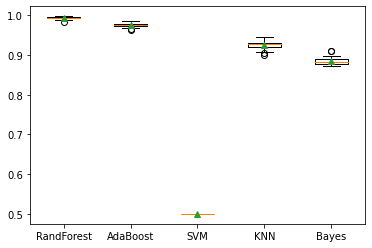

In [ ]:
import matplotlib.pyplot as plt

# plotting the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### **Random Forest Classifier**

In [ ]:
#Splitting the train and test set
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.1,random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
#Fitting the Random Forest Classifier parameters.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=20,max_depth=5)

In [ ]:
#Fitting the random forest model.
forest = forest.fit(X_train,y_train)

In [ ]:
#Predicting the values using the test set.
y_predict = forest.predict(X_test)
#Printing out the metrics that will be used to assess the accuracy of our model.
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[443   9]
 [  4 437]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       452
           1       0.98      0.99      0.99       441

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893



Our Random Forest Model achieved an accuracy of 99%. Our accuracy was close to perfection which might hint some overfitting. We will do hyperparameter tuning to obtain the optimum model for our classifier.

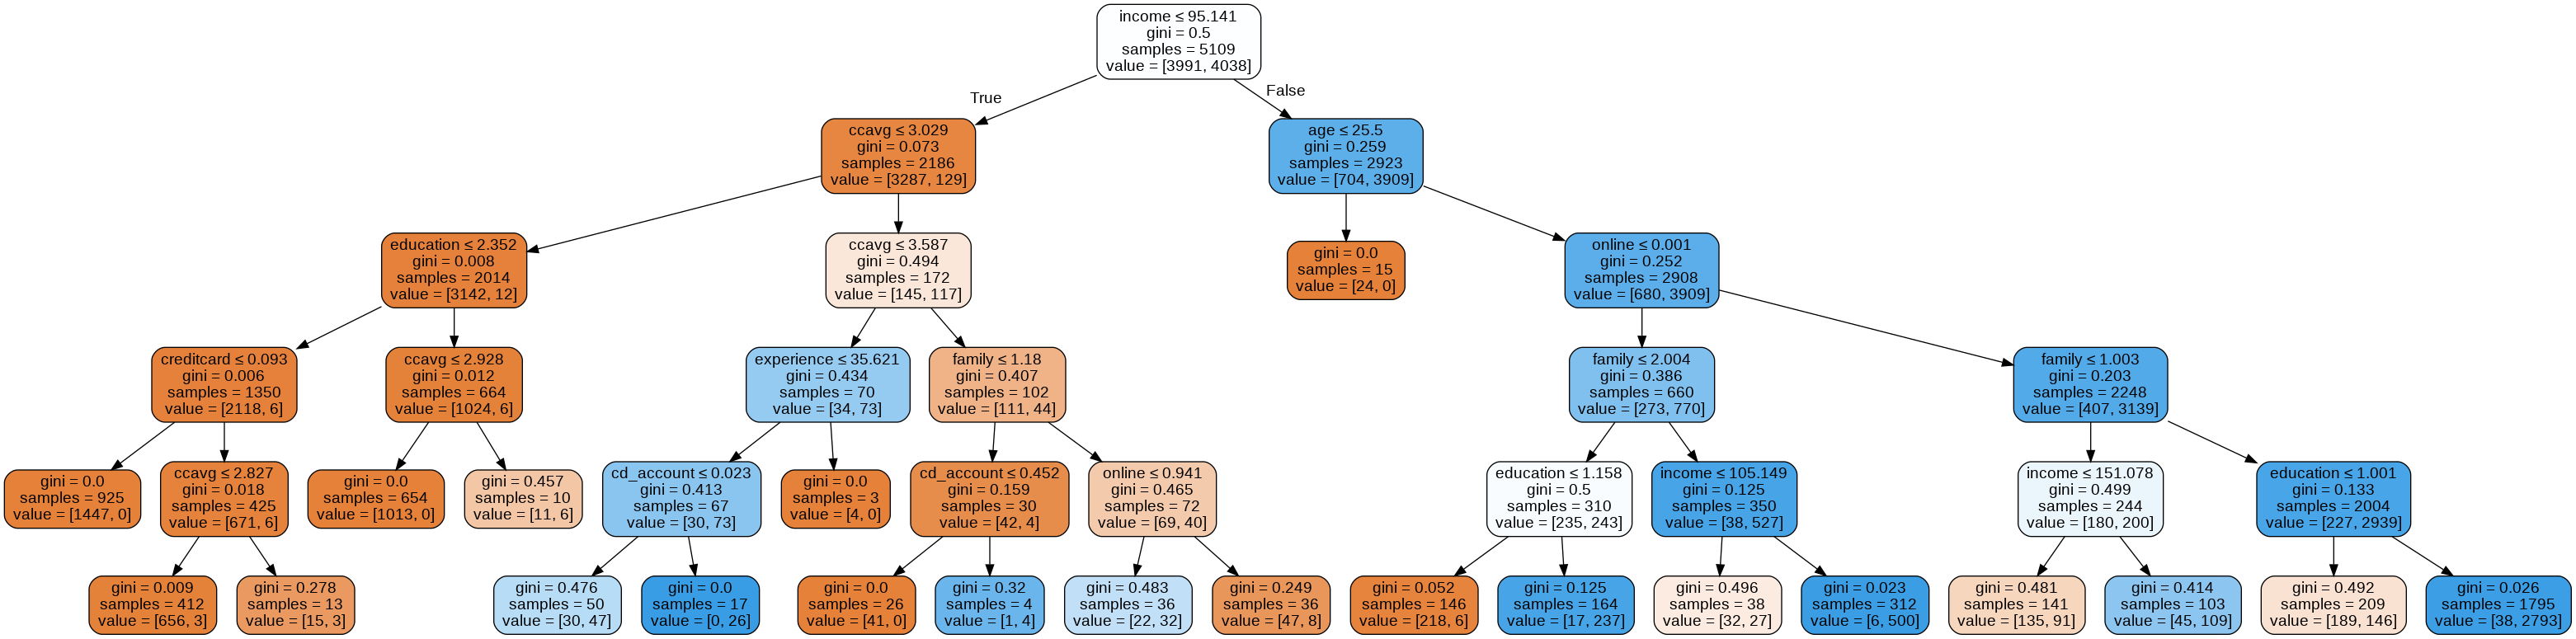

In [ ]:
#Visualizing the Decision Tree of our 3rd tree in our forest.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
StringIO().write(str((1,2)))
from IPython.display import Image 
import pydotplus

tree = forest.estimators_[3]
X = df.drop(['personal_loan','id'],axis=1)

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('Bank.png') 
Image(graph.create_png())

In [ ]:
#Printing out the feature importance of the 
important_feat = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

importance
feature                       
income                0.434548
ccavg                 0.194872
education             0.135964
cd_account            0.108045
family                0.040857
online                0.031035
creditcard            0.022691
mortgage              0.019332
securities_account    0.005844
age                   0.002316
experience            0.002301
zip_code              0.002196

Key takeaways:
The most important features in the Random Forest are the 

*   Income of the individual.
*   The Average Credit Card spending of the individual.
*   The Education level of the individual.
*   Whether one had a certificate of deposit account with the bank.



Visualizing the feature importances in our random forest model.

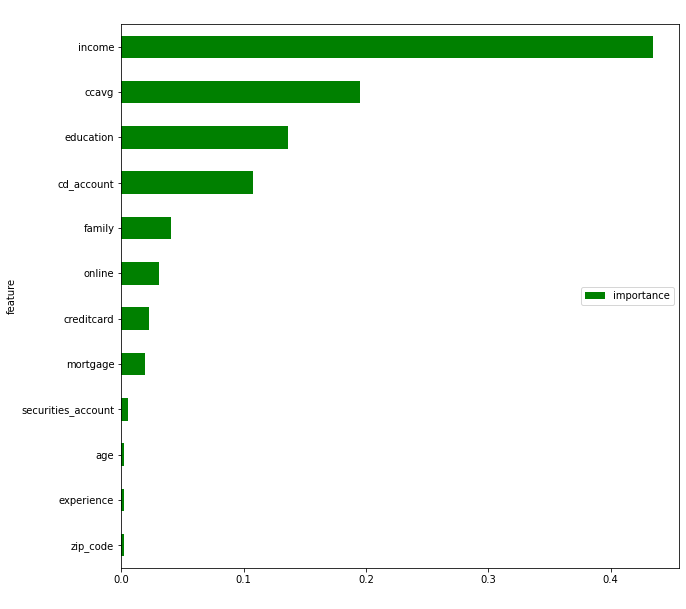

In [ ]:
#Printing out the feature importance horizontal bar chart
import matplotlib.pyplot as plt

important_df = important_feat[:12].sort_values(by = 'importance', ascending = True)
important_df.plot(kind = 'barh', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Feature importance shown visually', color = 'white', fontsize = 14)
plt.xlabel('Features importances', fontsize = 12, color = 'white')
plt.show()

**Hyperparameter tuning**

In [ ]:
#Defining the hyperparamters 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
#Creating an array for the no of trees between 200 and 2000
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=10)]
#Defining the number of features to consider at every split
max_features = ['auto','sqrt']
#Estimating the number of levels in every tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#Estimating the number of samples required to split at every node
min_samples_split = [2,5,10]
#Estimating the number of samples at each leaf node
min_samples_leaf = [1,2,4]
#Defining the methods of selecting samples for training at each tree
bootstrap = [True,False]

In [ ]:
#Creating a dictionary containing our defined hyperparamters
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

#Random Searching for hyperparameters using a cross validation of 3 models and ensuring we use the full computational power
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
#Fitting our tuned hyperparameters
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Printing out the best parameters in our GridSearch.

In [ ]:
#Searching for the best parameters for our model.
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

Fitting the best parameters in our Random Forest Classifier model.

In [ ]:
forest = RandomForestClassifier(n_estimators=1400,random_state=42,min_samples_split=2,max_depth=40,bootstrap='False',max_features='auto',min_samples_leaf=1)

In [ ]:
#Fitting the train data in our tuned model.
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Predicting the values in our test set
y_predict = forest.predict(X_test)

In [ ]:
#Printing out the metrics to assess our model.
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[436   8]
 [  7 438]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       444
           1       0.98      0.98      0.98       445

    accuracy                           0.98       889
   macro avg       0.98      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889



The tuned Random Forest Model still had an accuracy of 98%. But we have the optimum performance of the model even though the accuracy of the model reduced.

### **Ada Boost Classifier**

In [ ]:
#Importing the necessary library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Fitting our data in the Ada Boost Classifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=300,random_state=40)
ada_boost = ada_boost.fit(X_train,y_train)
#Predicting the values using our test set
y_pred_ada = ada_boost.predict(X_test)

In [ ]:
#Printing the metrics for assessing our model.
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[436   8]
 [  7 438]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       444
           1       0.98      0.98      0.98       445

    accuracy                           0.98       889
   macro avg       0.98      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889



The accuracy of the Ada Boost Classifier remained at 98% same as the tuned Random Forest Model.

In [ ]:
#Defining out the parameters in the AdaBoostClassifier model
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num=10)]
learning_rate = [0.01,0.05,0.1,0.3,1]
base_estimator__criterion = ['gini','entropy']
base_estimator__splitter = ['best','random']

In [ ]:
#Creating the dictionary that consists of the hyperparameters
random_grid = {'n_estimators' : n_estimators,
               'learning_rate' : learning_rate,
               'base_estimator__criterion' : base_estimator__criterion,
               'base_estimator__splitter' : base_estimator__splitter}
#Grid Searching the best parameters of our model
ada = AdaBoostClassifier(base_estimator =  DecisionTreeClassifier())
ada_random = RandomizedSearchCV(estimator=ada,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
#Fitting the data into our GridSearch
ada_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                         

In [ ]:
#Finding the best parameters for our model
ada_random.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'n_estimators': 10}

In [ ]:
#Fitting the best paramters for our model
ada_boost = AdaBoostClassifier(algorithm = 'SAMME.R',n_estimators = 10, learning_rate=0.01)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=10, random_state=None)

In [ ]:
#Using the model to predict values
y_predict = ada_boost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[368  76]
 [ 13 432]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       444
           1       0.85      0.97      0.91       445

    accuracy                           0.90       889
   macro avg       0.91      0.90      0.90       889
weighted avg       0.91      0.90      0.90       889



The tuned Ada Boost model accuracy reduced to a 90% accuracy using the optimum parameters of the ada boost. This reduced overfitting as posed by the random forest models.

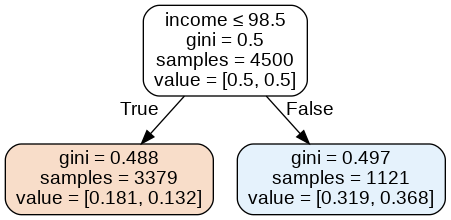

In [ ]:
#Printing out the 21st stump
dot_data = StringIO()

tree = ada_boost.estimators_[21]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Printing out the most important features in the ada boost model.
important_feat = pd.DataFrame({'feature': X.columns, 'importance': ada_boost.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

importance
feature                       
income                0.278261
ccavg                 0.217391
zip_code              0.165217
age                   0.078261
experience            0.069565
education             0.043478
mortgage              0.043478
cd_account            0.034783
family                0.026087
online                0.017391
creditcard            0.017391
securities_account    0.008696

## Support Vector Machines

### Linear Kernel

In [ ]:
#Fitting my data in a linear SVM model
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predicting the values using the test data
y_predict = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[383  61]
 [ 44 401]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       444
           1       0.87      0.90      0.88       445

    accuracy                           0.88       889
   macro avg       0.88      0.88      0.88       889
weighted avg       0.88      0.88      0.88       889



The linear kernel of the SVM model reduced accuracy to a 88% which is lower than the Random Forest model and the Ada Boost model.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


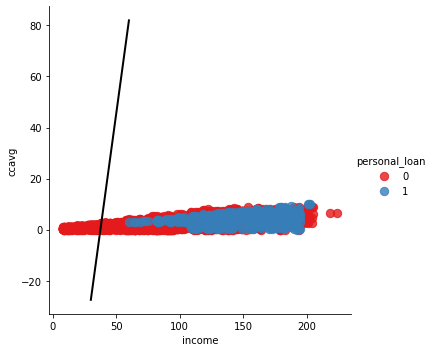

In [ ]:
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the hyperplane
sns.lmplot('income', 'ccavg', data=df, hue='personal_loan', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

### Other Kernel

In [ ]:
# # perfoming hyperparameter tuning for SVM using a GridSearchCV 
# define model and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# performing LDA with one component
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(metrics.confusion_matrix(y_test, grid_result.predict(X_test)))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[[387  57]
 [ 30 415]]
Best: 0.917990 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.897196 (0.010411) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.917990 (0.009779) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.883276 (0.009832) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.896779 (0.010210) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.917865 (0.009840) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.883526 (0.009809) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.894779 (0.009701) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.917949 (0.009858) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.885568 (0.010263) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.887652 (0.010433) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.917740 (0.009788) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.902238 (0.009439) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.880068 (0.012820) with: {'C': 0

Our best model in the Support Vector Machines is the rbf kernel which achieved an accuracy of 92%. 

##K-NN Classifier

In [ ]:
#Fitting our data in the KNeighbors Clasifier
from sklearn.neighbors import KNeighborsClassifier 
#Choosing an odd number 3 to help us classify our data
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
#Predict new values using our test data
from sklearn import metrics
y_pred = classifier.predict(X_test)
#Printing out the various metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[392  66]
 [ 19 414]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       458
           1       0.86      0.96      0.91       433

    accuracy                           0.90       891
   macro avg       0.91      0.91      0.90       891
weighted avg       0.91      0.90      0.90       891



The k-NN classifier achieved an accuracy of 90% which was fairly higher than the tuned Ada Boost and the SVM linear kernel.

**Hyperparameter tuning**

In [ ]:
#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(1,50,1))
n_neighbors = list(range(1,30,1))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

In [ ]:
#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)

In [ ]:
#Checking the performance of our model with a single dicriminant component.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#Fitting the train data into our model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1,

In [ ]:
# printing the best parameters
clf.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 20, 'p': 1}

In [ ]:
# running the parameters using the best parameters
classifier = KNeighborsClassifier(n_neighbors=20, p=1,metric='manhattan', leaf_size=1)
classifier.fit(X_train,y_train)

#Predict new values using our test data
from sklearn import metrics
y_pred = classifier.predict(X_test)
#Printing out the various metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[415  43]
 [ 38 395]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       458
           1       0.90      0.91      0.91       433

    accuracy                           0.91       891
   macro avg       0.91      0.91      0.91       891
weighted avg       0.91      0.91      0.91       891



After hyperparameter tuning the model performs better at 91%. The confusion matrix also illustrates the model's reduced instances of misclassification therefore the model is better performing.

## **Naive Bayes Classifier**

In [ ]:
#Importing the Gaussian Naive BayesClassifier
from sklearn.naive_bayes import GaussianNB
#Fitting the data into our model
clf = GaussianNB()
#Reduction technique using LDA which robustly improves the performance of the Naive Bayes
#Using one principal component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
model = clf.fit(X_train,y_train)
#Predicting using the test values
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[416  42]
 [ 38 395]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       458
           1       0.90      0.91      0.91       433

    accuracy                           0.91       891
   macro avg       0.91      0.91      0.91       891
weighted avg       0.91      0.91      0.91       891



The Naive Bayes Classifier achieved an accuracy of 90%.

**Stacking the models** 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

>RandForest 0.994 (0.003)
>AdaBoost 0.895 (0.010)
>SVM 0.652 (0.018)
>KNN 0.905 (0.011)
>Bayes 0.883 (0.012)
>stacking 0.995 (0.003)


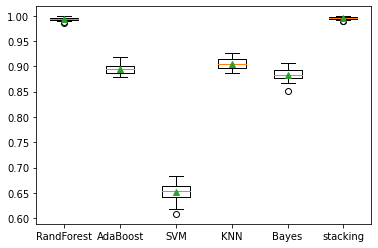

In [ ]:
# compare ensemble to each baseline classifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
 
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('RandForest', RandomForestClassifier()))
	level0.append(('KNN', KNeighborsClassifier()))
	level0.append(('AdaBoost', AdaBoostClassifier()))
	level0.append(('SVM', SVC()))
	level0.append(('Bayes', GaussianNB()))
	# define meta learner model
	level1 = RandomForestClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['RandForest'] = RandomForestClassifier(bootstrap= False,max_depth= 40,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 1400)
  models['AdaBoost'] = AdaBoostClassifier(algorithm='SAMME.R',learning_rate= 0.01,n_estimators= 10)
  models['SVM'] = SVC(C=50,gamma='scale', kernel='rbf')
  models['KNN'] = KNeighborsClassifier(metric='manhattan',n_neighbors=20, p=1, leaf_size=1)
  models['Bayes'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Solution

We did five models in our analysis that are the:

*   Random Forest Classifier
*   Ada Boost Classifier
*   The Support Vector Machines
*   The k- Nearest Neighbors
*   The Naive Bayes Classifier

Optimization for the best parameters was done in most of the models therefore the optimal performance for each model was achieved. As seen at the beginning of the analysis, we estimated the performance for each model where our Random Forest Classifier outdid the rest of the models and the Support Vector Machines performed worst of all the models. This was also seen in the tuning of our models where the Random Forest achieved the highest accuracy.

Below are the best model performing accuracies for all our models:


*   Random Forest Classifier : 98%
*   Ada Boost Classifier : 90%
*   Support Vector Machines : 65.2% 
*   k-NN Algorithm : 91%
*   Naive Bayes Algorithm : 88.3%




The Random Forest Classifier was the best perfroming model in terms of accuracy.The most important features according to the Random Forest Model are the:


*   Income of the individual.
*   Average Credit Card Spending of the individual.
*   The Education Level of the Individual.
*   Whether one had a Certificate of Deposit account with the bank.


The most important features according to the Ada Boost Classifer are the:


*   Income of the individual.
*   Average Credit Card Spending of the individual.
*   The zipcode of the individual.
*   The age of the individual.

The Random Forest and the Ada Boost both agree that the income and the average credit card spending of the individual are the two most important features in prediction.




# Challenging the solution

### Neural Networks

We'll challenge our model using Neural Networks.
We are going to build a multi-layer perceptron. This is also known as a feed-forward neural network. That’s opposed to the recurrent ones that can make more than one pass through the network in an attempt to boost the accuracy of the model.

In [ ]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Setting up our labels and features
X =  data.drop(['ID','Personal Loan'], axis = 1)
y = data['Personal Loan']

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
#Lets check the shape for our features
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(4000, 12) train samples
(1000, 12) test samples


In [ ]:
#Feature Scaling

# Import a standardization library
from sklearn.preprocessing import StandardScaler
#Initialize the scaler
scaler = StandardScaler()

#Fitting the scaler
scaler.fit(X_train)

#Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
#We'll create a Keras sequential model, which means building up the layers in the neural network by adding them one at a time.
#Picking an activation function for each layer
#For the first two layers we'll use a relu (rectified linear unit) activation function.
#The input shape is the shape (dimensions) of the input on the first layer. We'll use 12 as that is the number of features we have. 
#Dense is to apply the activation function. The first argument in the Dense function is the number of hidden units.
#Dropout is a means of optimizing our neural net by disabling some of the nodes. In our case 30% of them

#Creating a feed forward network
model = Sequential()

#Hidden layer 1, 12 nodes, activation_fn: relu, input is our predictor features
model.add(Dense(12, activation='relu', input_shape=(12,)))

#Disable 30% of nodes in this layer to improve network's accuracy
model.add(Dropout(0.3))

#Hidden layer 2, 12 nodes, activation_fn: relu, input is the result of hidden layer 1. This is automatically done by the framework
model.add(Dense(12, activation='relu'))

#Disable 30% of nodes in hidden layer 2
model.add(Dropout(0.3)) 

#Output layer that will eventually provide the result of the training
model.add(Dense(1, activation='sigmoid'))

#Provides a summary of how our network will look like
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Let's train the model

#Set learning rate to 0.001
learning_rate = 0.001

#Optimizer uses an optimizing algorithm. RMSProp is one of them, others include sgd, momentum and adam.
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=learning_rate), metrics=['accuracy'])

In [ ]:
#Let's now fit with the training data
#We train our model over 10 iterations
#Batch size means the algorithms groups the 4000 items into groups of 1 training each group until 4000 items are trained resulting in end of epoch.
model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3444 - accuracy: 0.9032 - val_loss: 0.2428 - val_accuracy: 0.9120
Epoch 2/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2698 - accuracy: 0.9190 - val_loss: 0.1811 - val_accuracy: 0.9370
Epoch 3/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2452 - accuracy: 0.9345 - val_loss: 0.1546 - val_accuracy: 0.9510
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2197 - accuracy: 0.9435 - val_loss: 0.1557 - val_accuracy: 0.9610
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2109 - accuracy: 0.9470 - val_loss: 0.1504 - val_accuracy: 0.9660
Epoch 6/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2021 - accuracy: 0.9513 - val_loss: 0.1317 - val_accuracy: 0.9710
Epoch 7/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1832 - accuracy: 0.9570 - val_loss: 0.1411 - val_accuracy:

In [ ]:
#Here are the weights for each layer we mentioned.
for layer in model.layers:
    weights = layer.get_weights()
print(weights)

[array([[ 0.8579097 ],
       [-0.31444174],
       [-0.32596096],
       [-0.3110488 ],
       [-0.44855297],
       [-0.2834949 ],
       [ 0.7795279 ],
       [ 0.74959505],
       [ 0.44055358],
       [-0.26225275],
       [ 0.83754086],
       [-0.22425286]], dtype=float32), array([1.2489108], dtype=float32)]


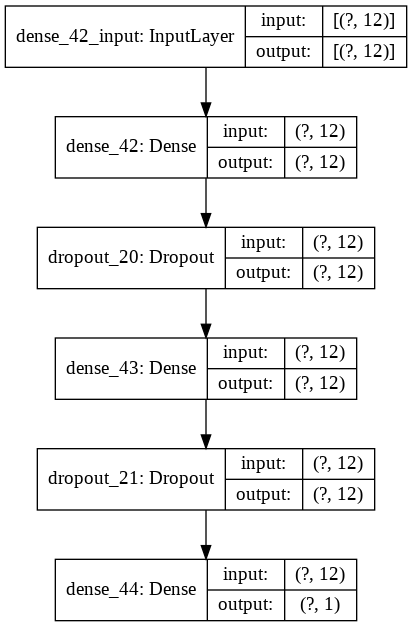

In [ ]:
#We can also draw a picture of the layers and their shapes. It’s not very useful but it is nice to see.
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

The shape of the output is 1, as there we have our prediction.

In [ ]:
#We can get configuration information on each layer
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'name': 'dense_42_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 12),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_42',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_20',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': No

In [ ]:
#Now we can run predictions on test data.
y_pred = model.predict_classes(X_test)

#Evaluating the performance of ur model
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------------')

print(classification_report(y_test,y_pred))

[[906   1]
 [ 19  74]]
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.99      0.80      0.88        93

    accuracy                           0.98      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.98      0.98      0.98      1000



From our evaluation, we can conclude that only 20 personal loan was misclassified giving us an accuracy score of 98%. This result is acceptable and the neural networks is a very commendable model.

##  Follow up questions


---



a). Did we have the right data?

Yes,we had the right data and it has very well accomplished the tasks given to advise the management and the next marketing campaign will be more targeted.

b). Did we have the right question?

Yes, we had the right questions in relation to the business problem at hand.

# Conclusion


---
1. The best performing model is the random forest with an accuracy of 98%

2. The bank should target customers who have the following attributes:

    * Customers above 40 years.

    *Professionals and Graduates.

    * Customers with securities
account, a CD account and credit
card

    * Customers who use online
banking.

    * Customers with less than 20 years
of professional experience.

    * Customers with large family sizes.

    * Customers with high income.

    * Customers with a high average
spending on credits per month.

3. The Bank should find ways of attracting the customers with rhe following attributes.
  * Customers below 40 years.

  * Undergraduates.

  * Customers who do not have
securities account, a CD account
and credit card

  * Customers who do not use online
banking.

  * Customers with over 20 years
of professional experience.

   * Customers with a small family
size

   * Customers with low income.

   * Customers with a low average
spending on credits per month.

4. The bank should increase the features of the loans to cater for a wider market.